# Decision tree implementation on iris dataset

# Import all necessary libraries 

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [60]:
df = pd.read_csv('E:\IRIS.csv')

# Data Wrangling

In [61]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
df.shape

(150, 5)

In [45]:
len(df.index)

150

In [46]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Converting strings into categorical values

In [62]:
sp = pd.get_dummies(df['species'])

In [63]:
sp

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [67]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# Drop ununnecessary Columns and merge new columns

In [65]:
df.drop('species',axis=1,inplace=True)

In [66]:
df = pd.concat([df,sp],axis=1)

# Visualization part

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

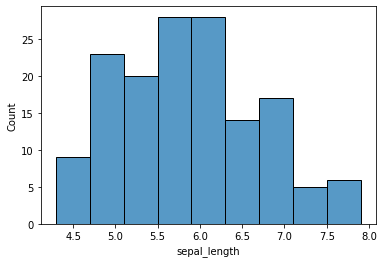

In [70]:
sns.histplot(x='sepal_length',data=df)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

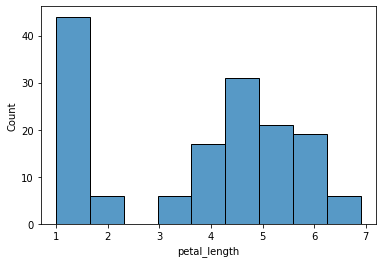

In [79]:
sns.histplot(x='petal_length',data=df)

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

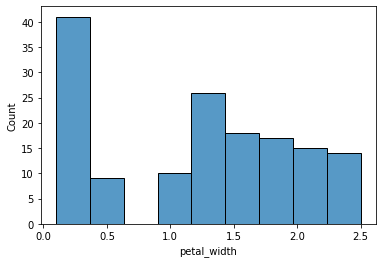

In [80]:
sns.histplot(x='petal_width',data=df)

In [81]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


<AxesSubplot:>

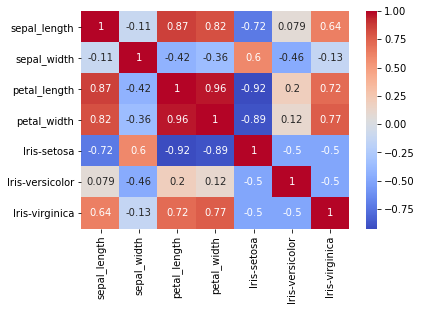

In [84]:
corr = df.corr()
sns.heatmap(corr,annot =True,cmap='coolwarm')

In [88]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0


# Time to buld DecisionTree Model

In [86]:
X = df.iloc[:,0:4]

In [87]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [89]:
y = df.iloc[:,4:7]

In [90]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
model = DecisionTreeClassifier(criterion = 'entropy',random_state=0)

In [97]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [98]:
y_pred = model.predict(X_test)

In [100]:
model.predict([[4.6,3.1,1.5,0.2]])

array([[1, 0, 0]], dtype=uint8)

In [102]:
model.score(X_test,y_test)

1.0

In [109]:
from sklearn import tree
text = tree.export_text(model)
print(text)

|--- feature_3 <= 0.80
|   |--- class: 1
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 0
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 0



[Text(418.5, 348.81, 'X[3] <= 0.8\nentropy = 0.916\nsamples = 120\nvalue = [[81, 39]\n[83, 37]\n[76, 44]]'),
 Text(354.11538461538464, 285.39, 'entropy = 0.0\nsamples = 39\nvalue = [[0, 39]\n[39, 0]\n[39, 0]]'),
 Text(482.8846153846154, 285.39, 'X[3] <= 1.75\nentropy = 0.663\nsamples = 81\nvalue = [[81, 0]\n[44, 37]\n[37, 44]]'),
 Text(257.53846153846155, 221.97, 'X[2] <= 4.95\nentropy = 0.313\nsamples = 40\nvalue = [[40, 0]\n[4, 36]\n[36, 4]]'),
 Text(128.76923076923077, 158.55, 'X[3] <= 1.65\nentropy = 0.125\nsamples = 35\nvalue = [[35, 0]\n[1, 34]\n[34, 1]]'),
 Text(64.38461538461539, 95.13, 'entropy = 0.0\nsamples = 34\nvalue = [[34, 0]\n[0, 34]\n[34, 0]]'),
 Text(193.15384615384616, 95.13, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(386.3076923076923, 158.55, 'X[3] <= 1.55\nentropy = 0.647\nsamples = 5\nvalue = [[5, 0]\n[3, 2]\n[2, 3]]'),
 Text(321.9230769230769, 95.13, 'entropy = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[0, 2]]'),
 Text(450.6923076923

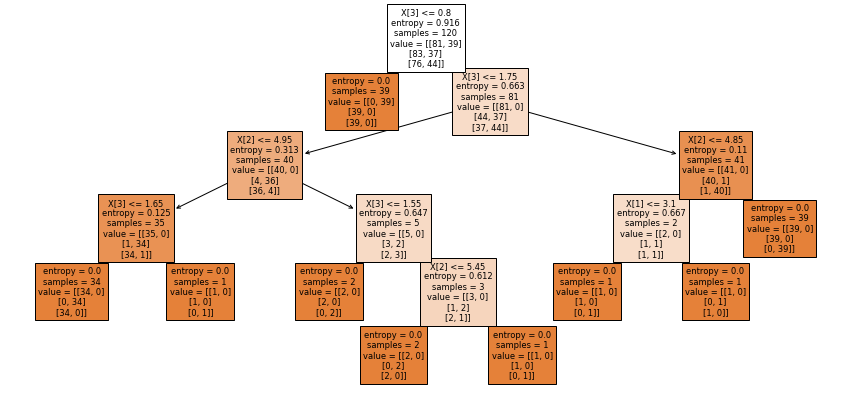

In [111]:
fig = plt.figure(figsize=(15,7))
tree.plot_tree(model,filled= True)

# The model is ready

# The End